In [4565]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',None)

In [4403]:
matches = pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [4404]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4405]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [4406]:
matches['team1'] = matches['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['team2'] = matches['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

matches['toss_winner'] = matches['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['winner'] = matches['winner'].str.replace('Delhi Daredevils','Delhi Capitals')



matches['team1'] = matches['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['team2'] = matches['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

matches['toss_winner'] = matches['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['winner'] = matches['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [4407]:
matches = matches[matches['team1'].isin(teams)]
matches = matches[matches['team2'].isin(teams)]

In [4408]:
delivery=delivery.drop(delivery [delivery['is_super_over'] != 0].index)
year=matches[['id','season']]
year.rename(columns={'id':'match_id'},inplace=True)

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/1904191967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year.rename(columns={'id':'match_id'},inplace=True)


In [4409]:
team_names=matches['team1'].unique()

In [4410]:
year

,match_id,season
0,1,2017
4,5,2017
6,7,2017
7,8,2017
9,10,2017
...,...,...
751,11347,2019
752,11412,2019
753,11413,2019
754,11414,2019


# MAN OF MATCH OVERALL COUNT

In [4411]:
num_man_of_match=matches['player_of_match'].value_counts().reset_index()

In [4412]:
num_man_of_match=num_man_of_match.head(10)

# MAN OF MATCH SEASON COUNT

In [4413]:
num_man_of_match_season=matches['player_of_match'].reset_index()

In [4414]:
num_man_of_match_season=num_man_of_match_season.drop(columns={'index'},axis=1)

In [4415]:
num_man_of_match_season.rename(columns={'player_of_match':'player_of_match_copy'},inplace=True)

In [4416]:
matches['player_of_match_copy']=num_man_of_match_season['player_of_match_copy']

In [4417]:
num_man_of_match_season=matches.groupby(['season','player_of_match'])['player_of_match_copy'].count().reset_index()

In [4418]:
num_man_of_match_season

,season,player_of_match,player_of_match_copy
0,2008,A Kumble,1
1,2008,A Mishra,1
2,2008,A Nehra,1
3,2008,AC Gilchrist,2
4,2008,BB McCullum,1
...,...,...,...
445,2019,SPD Smith,0
446,2019,SR Watson,0
447,2019,SS Iyer,0
448,2019,V Kohli,0


# NUM MATCHES PLAYED SEASON

In [4419]:
num_matches_played_season=matches.groupby(['season'])['id'].count().reset_index()
num_matches_played.rename(columns={'id':'matches_played'},inplace=True)

# HIGHEST SEASON & TEAM SCORE 

In [4420]:
highest_score=delivery.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()

In [4421]:
highest_score=pd.merge(highest_score,year,on='match_id')

In [4422]:
highest_season_score=highest_score.groupby(['season'])['total_runs'].max().reset_index()

In [4423]:
highest_team_score=highest_score.groupby(['batting_team'])['total_runs'].max().reset_index()

In [4554]:
num_matches_played['highest_score'] =  highest_season_score['total_runs']

In [4556]:
num_matches_played.to_csv('season_matches_and_score.csv',index=False)

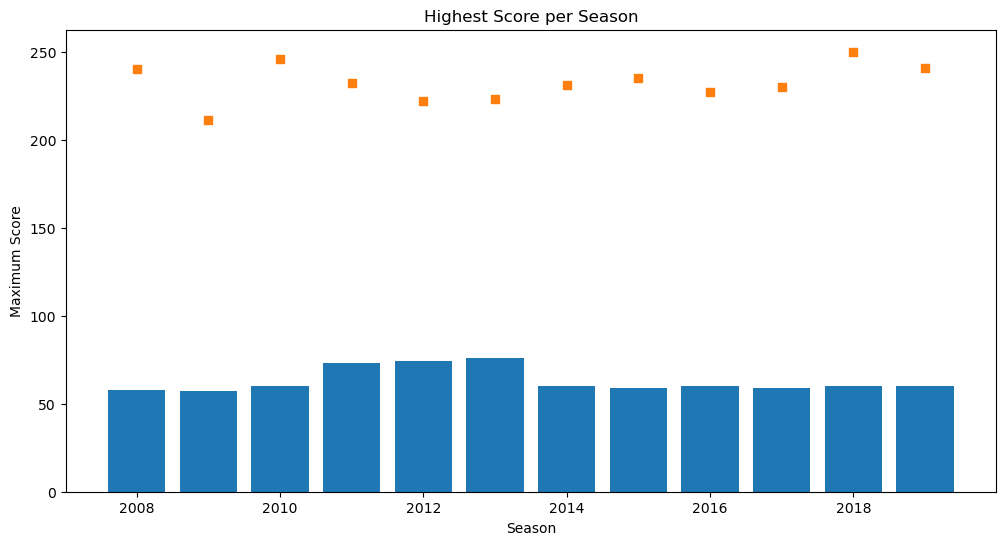

In [4560]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dataframe with the data
df = pd.DataFrame({
    'season': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'matches_played': [58, 57, 60, 73, 74, 76, 60, 59, 60, 59, 60, 60],
    'highest_score': [240, 211, 246, 232, 222, 223, 231, 235, 227, 230, 250, 241]
})

# create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12,6))

# create the bar plot
ax1.bar(df['season'], df['matches_played'])
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of Matches Played')
ax1.set_title('Matches Played per Season')

# create the scatter plot
ax1.scatter(df['season'], df['highest_score'],marker='s')
ax1.set_xlabel('Season')
ax1.set_ylabel('Maximum Score')
ax1.set_title('Highest Score per Season')

# display the plot
plt.show()


# NUM_MATCHES_PLAYED_IN_STADIUM

In [4424]:
num_matches_venue=matches['venue'].value_counts().reset_index()

In [4581]:
num_matches_venue.rename(columns={'index':'venue','venue':'count'},inplace=True)

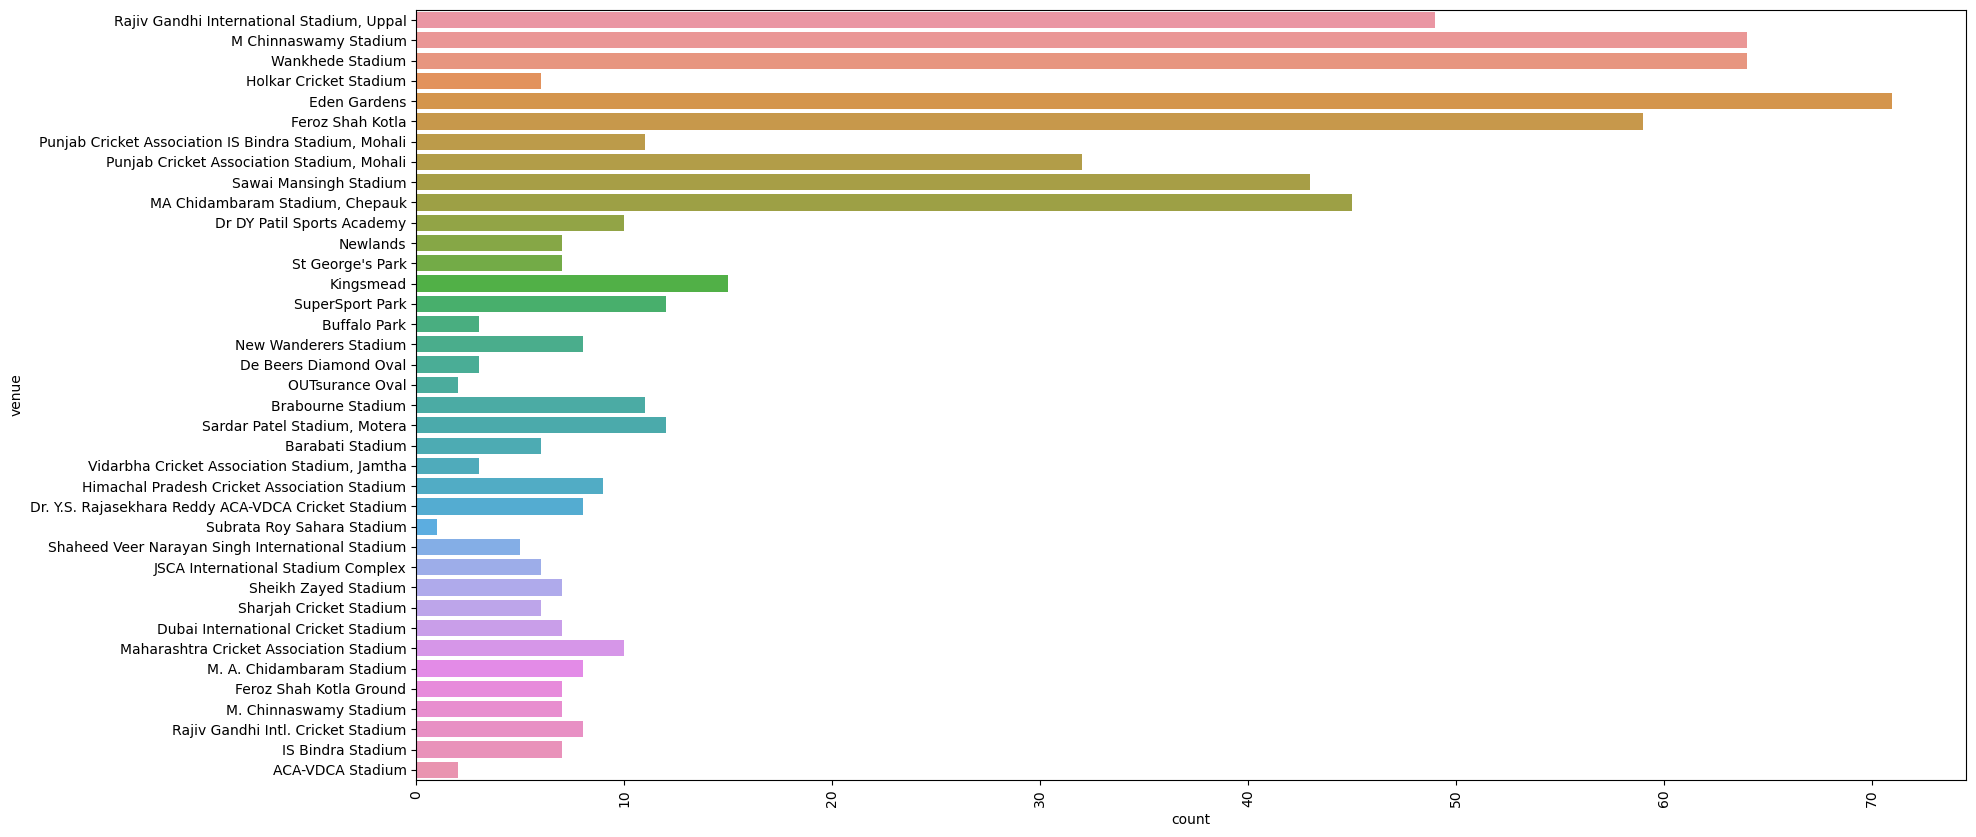

In [4586]:
plt.figure(figsize = (20, 10))
sns.countplot(y = 'venue', data = matches)
plt.xticks(rotation = 90)
plt.show()

# NUM_MATCHES_PLAYED_IN_STADIUM_SEASON

In [4425]:
st=matches['venue']

In [4426]:
st=st.reset_index()

In [4427]:
st=st.drop(columns={'index'},axis=1)

In [4428]:
st.rename(columns={'venue':'stadium'},inplace=True)

In [4429]:
matches['stadium']=st['stadium']

In [4430]:
num_matches_venue_season=matches.groupby(['season','venue'])['stadium'].count().reset_index()

# TOURNAMENT_SIXES

In [4431]:
tounament_sixes = delivery[delivery['batsman_runs']==6]

In [4432]:
tounament_sixes = tounament_sixes.groupby(['match_id'])['batsman_runs'].count().reset_index()

In [4433]:
tounament_sixes = pd.merge(tounament_sixes,year,on="match_id")

In [4434]:
tounament_sixes = tounament_sixes.groupby('season')['batsman_runs'].sum().reset_index()

In [4435]:
tounament_sixes.rename(columns={'batsman_runs':'sixes'},inplace=True)

In [4436]:
tounament_sixes

,season,sixes
0,2008,623
1,2009,506
2,2010,585
3,2011,412
4,2012,590
5,2013,522
6,2014,714
7,2015,692
8,2016,363
9,2017,356


# TOURNAMENT_FOURS

In [4437]:
tounament_fours = delivery[delivery['batsman_runs']==4]

In [4438]:
tounament_fours = tounament_fours.groupby(['match_id'])['batsman_runs'].count().reset_index()

In [4439]:
tounament_fours = pd.merge(tounament_fours,year,on="match_id")

In [4440]:
tounament_fours = tounament_fours.groupby('season')['batsman_runs'].sum().reset_index()

In [4441]:
tounament_fours.rename(columns={'batsman_runs':'fours'},inplace=True)

In [4442]:
tounament_fours

,season,fours
0,2008,1703
1,2009,1317
2,2010,1708
3,2011,1284
4,2012,1533
5,2013,1631
6,2014,1562
7,2015,1607
8,2016,887
9,2017,833


In [4443]:
boundaries=tounament_sixes

In [4444]:
boundaries['fours']=tounament_fours['fours']

In [4445]:
boundaries

,season,sixes,fours
0,2008,623,1703
1,2009,506,1317
2,2010,585,1708
3,2011,412,1284
4,2012,590,1533
5,2013,522,1631
6,2014,714,1562
7,2015,692,1607
8,2016,363,887
9,2017,356,833


In [4446]:
boundaries.to_csv('boundaries.csv',index=False)

# PURPLE_CAP

In [4447]:
out = delivery
out['player_dismissed'] = out['player_dismissed'].replace(np.nan, 0)
out.player_dismissed[out.player_dismissed != 0] = 1

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/561585546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out.player_dismissed[out.player_dismissed != 0] = 1


In [4448]:
out = out.drop(out[out['dismissal_kind']=='run out'].index)

In [4449]:
wic_taken_season = out.groupby(['match_id','bowler'])['player_dismissed'].sum().reset_index()

In [4450]:
wic_taken_season = pd.merge(wic_taken_season,year,on='match_id')

In [4451]:
wic_taken_season = wic_taken_season.groupby(['season','bowler'])['player_dismissed'].sum().reset_index()

In [4452]:
wic_taken_season_max = wic_taken_season.groupby(['season'])['player_dismissed'].max()

In [4453]:
purple_cap = pd.DataFrame(columns=['season', 'bowler', 'player_dismissed'])

In [4454]:
wic_taken_season_max

season
2008    22
2009    23
2010    21
2011    21
2012    22
2013    29
2014    23
2015    26
2016    15
2017    21
2018    24
2019    26
Name: player_dismissed, dtype: int64

In [4455]:
for season,wic in wic_taken_season_max.items():
        row=wic_taken_season[(wic_taken_season['season']==season)&(wic_taken_season['player_dismissed']==wic)]
        purple_cap = purple_cap.append(row, ignore_index=True) 

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/3884308380.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  purple_cap = purple_cap.append(row, ignore_index=True)


In [4456]:
purple_cap.to_csv('purple_cap.csv',index=False)

In [4457]:
purple_cap

,season,bowler,player_dismissed
0,2008,Sohail Tanvir,22
1,2009,RP Singh,23
2,2010,PP Ojha,21
3,2011,SL Malinga,21
4,2012,SP Narine,22
5,2013,DJ Bravo,29
6,2014,MM Sharma,23
7,2015,DJ Bravo,26
8,2016,YS Chahal,15
9,2017,B Kumar,21


In [4458]:
purple_cap[purple_cap['season']==2018]

,season,bowler,player_dismissed
10,2018,AJ Tye,24


# ORANGE_CAP

In [4459]:
data=delivery.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()

In [4460]:
data=pd.merge(data,year,on='match_id')

In [4461]:
batsman_runs_season=data.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()

In [4462]:
batsman_runs_overall_max=batsman_runs_season.groupby(['season'])['batsman_runs'].max()

In [4463]:
orange_cap=pd.DataFrame(columns=['batsman','season','batsman_runs'])

In [4464]:
for season,runs in batsman_runs_overall_max.items():
        row=batsman_runs_season[(batsman_runs_season['season']==season)&(batsman_runs_season['batsman_runs']==runs)]
        orange_cap = orange_cap.append(row, ignore_index=True)

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/274278588.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orange_cap = orange_cap.append(row, ignore_index=True)


In [4465]:
orange_cap.to_csv('orange_cap.csv',index=False)

# TOSS_BASED_MATCHES_WIN


In [4466]:
toss_based_matches_win = matches[['team1','team2','toss_winner','winner']]

In [4467]:
team1=toss_based_matches_win['team1'].value_counts().reset_index()

In [4468]:
team2=toss_based_matches_win['team2'].value_counts().reset_index()

In [4469]:
team1.rename(columns={'index':'Team','team1':'count'},inplace=True)
team2.rename(columns={'index':'Team','team2':'count'},inplace=True)

In [4470]:
team1=team1.sort_values(by='Team')
team1=team1.reset_index(drop=True)
team2=team2.sort_values(by='Team')
team2=team2.reset_index(drop=True)

In [4471]:
team=team1

In [4472]:
team['count'] = team['count']+team2['count']
team.rename(columns={'count':'matches_played'},inplace=True)

In [4473]:
matches_win=matches['winner'].value_counts().reset_index()

In [4474]:
matches_win.rename(columns={'winner':'matches_win'},inplace=True)

In [4475]:
matches_win.rename(columns={'index':'Team'},inplace=True)

In [4476]:
matches_win=matches_win.sort_values(by='Team')
matches_win=matches_win.reset_index(drop=True)

In [4477]:
team['matches_win']=matches_win['matches_win']      

In [4478]:
team['matches_loose']=team1['matches_played']-team1['matches_win']

In [4479]:
toss_winner_count=matches['toss_winner'].value_counts().reset_index()

In [4480]:
toss_winner_count.rename(columns={'index':'Team'},inplace=True)

In [4481]:
toss_winner_count=toss_winner_count.sort_values(by='Team')
toss_winner_count=toss_winner_count.reset_index(drop=True)

In [4482]:
team['toss_win_count']=toss_winner_count['toss_winner']

In [4483]:
toss_win_match_win=matches[matches['toss_winner']==matches['winner']]

In [4484]:
toss_win_match_win=toss_win_match_win['toss_winner'].value_counts().reset_index()

In [4485]:
toss_win_match_win.rename(columns={'index':'Team','toss_winner':'toss_win_match_win_count'},inplace=True)

In [4486]:
toss_win_match_win=toss_win_match_win.sort_values(by='Team')
toss_win_match_win=toss_win_match_win.reset_index(drop=True)

In [4487]:
team['toss_win_match_win_count']=toss_win_match_win['toss_win_match_win_count']

In [4488]:
toss_result_all=matches[['toss_decision','winner','season']]

In [4489]:
match_win_bat=toss_result_all[match_win['toss_decision']=='bat'].reset_index(drop=True)

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/600731832.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  match_win_bat=toss_result_all[match_win['toss_decision']=='bat'].reset_index(drop=True)


In [4490]:
match_win_field=toss_result_all[match_win['toss_decision']=='field'].reset_index(drop=True)

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/3392376377.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  match_win_field=toss_result_all[match_win['toss_decision']=='field'].reset_index(drop=True)


In [4491]:
match_win_bat=match_win_bat['winner'].value_counts().reset_index()
match_win_field=match_win_field['winner'].value_counts().reset_index()

In [4492]:
match_win_bat.rename(columns={'index':'Team','winner':'match_win_bat'},inplace=True)
match_win_field.rename(columns={'index':'Team','winner':'match_win_field'},inplace=True)

In [4493]:
match_win_bat=match_win_bat.sort_values(by='Team')
match_win_bat=match_win_bat.reset_index(drop=True)
match_win_field=match_win_field.sort_values(by='Team')
match_win_field=match_win_field.reset_index(drop=True)

In [4494]:
team=team.merge(match_win_bat, on='Team', how='left')

In [4495]:
team=team.merge(match_win_field, on='Team', how='left')

In [4496]:
team['match_win_bat']=team['match_win_bat'].replace(np.nan,0)

In [4497]:
team['match_win_bat']=team['match_win_bat'].astype(int )

In [4514]:
team.to_csv('team_toss_stats.csv')

# TOSS RESULT BASED WINNING

In [4498]:
toss_result=matches[['toss_decision','winner','season']]

In [4499]:
bat_win=toss_result[match_win['toss_decision']=='bat'].reset_index(drop=True)

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/3273178039.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bat_win=toss_result[match_win['toss_decision']=='bat'].reset_index(drop=True)


In [4500]:
field_win=toss_result[match_win['toss_decision']=='field'].reset_index(drop=True)


/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/3502243478.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  field_win=toss_result[match_win['toss_decision']=='field'].reset_index(drop=True)


In [4501]:
match_win_bat1=bat_win

In [4502]:
bat_win['winner_copy']=match_win_bat1['winner']

In [4503]:
match_win_field1=field_win

In [4504]:
field_win['winner_copy']=match_win_field1['winner']

In [4505]:
bat_win = bat_win.groupby(['season','winner'])['winner_copy'].count().reset_index()
field_win=field_win.groupby(['season','winner'])['winner_copy'].count().reset_index()

In [4506]:
field_win.rename(columns={'winner_copy':'matches_win'},inplace=True)
bat_win.rename(columns={'winner_copy':'matches_win'},inplace=True)

In [4507]:
bat_win.head(10)

,season,winner,matches_win
0,2008,Chennai Super Kings,6
1,2008,Delhi Capitals,3
2,2008,Kings XI Punjab,4
3,2008,Kolkata Knight Riders,5
4,2008,Mumbai Indians,1
5,2008,Rajasthan Royals,4
6,2008,Royal Challengers Bangalore,3
7,2009,Chennai Super Kings,6
8,2009,Delhi Capitals,5
9,2009,Kings XI Punjab,4


In [4508]:
field_win.head(10)

,season,winner,matches_win
0,2008,Chennai Super Kings,3
1,2008,Delhi Capitals,4
2,2008,Kings XI Punjab,6
3,2008,Kolkata Knight Riders,1
4,2008,Mumbai Indians,6
5,2008,Rajasthan Royals,9
6,2008,Royal Challengers Bangalore,1
7,2008,Sunrisers Hyderabad,2
8,2009,Chennai Super Kings,2
9,2009,Delhi Capitals,5


In [4509]:
toss_based_win=field_win.merge(bat_win,  left_on=['season','winner'], right_on = ['season','winner'], how='outer')

In [4510]:
toss_based_win=toss_based_win.replace(np.nan,0)

In [4511]:
toss_based_win.rename(columns={'matches_win_x':'field_win','matches_win_y':'bat_win'},inplace=True)

In [4512]:
toss_based_win['field_win']= toss_based_win['field_win'].astype(int)
toss_based_win['bat_win']= toss_based_win['bat_win'].astype(int)

In [4513]:
toss_based_win.to_csv('toss_based_win.csv',index=False)

In [4528]:
toss_based_percent_winning=toss_based_win.groupby(['season'])['field_win','bat_win'].sum().reset_index()

/var/folders/80/x1svf9ms1zvcvb7klmk6nzlr0000gn/T/ipykernel_37206/882681401.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  toss_based_percent_winning=toss_based_win.groupby(['season'])['field_win','bat_win'].sum().reset_index()


In [4530]:
toss_based_percent_winning['field_win_percent']=toss_based_percent_winning['field_win']*100/(toss_based_percent_winning['field_win']+toss_based_percent_winning['bat_win'])

In [4532]:
toss_based_percent_winning['field_win_percent']=toss_based_percent_winning['field_win_percent'].round(decimals=2)

In [4534]:
toss_based_percent_winning['bat_win_percent']=100-toss_based_percent_winning['field_win_percent']

In [4563]:
team_won=team[['Team','matches_win']]

In [4577]:
team_won

,Team,matches_win
0,Chennai Super Kings,95
1,Delhi Capitals,68
2,Kings XI Punjab,74
3,Kolkata Knight Riders,84
4,Mumbai Indians,100
5,Rajasthan Royals,70
6,Royal Challengers Bangalore,72
7,Sunrisers Hyderabad,75


<AxesSubplot:xlabel='matches_win', ylabel='Team'>

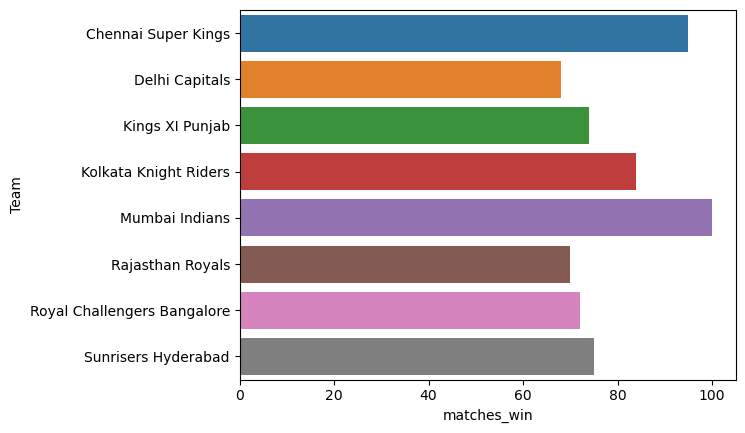

In [4578]:
sns.barplot(y = team_won.Team, x = team_won.matches_win)


In [4587]:
team

,Team,matches_played,matches_win,matches_loose,toss_win_count,toss_win_match_win_count,match_win_bat,match_win_field
0,Chennai Super Kings,156,95,61,86,55,49,46
1,Delhi Capitals,161,68,93,81,36,28,40
2,Kings XI Punjab,161,74,87,74,31,19,55
3,Kolkata Knight Riders,163,84,79,82,46,31,53
4,Mumbai Indians,170,100,70,89,51,39,61
5,Rajasthan Royals,140,70,70,76,39,31,39
6,Royal Challengers Bangalore,164,72,92,75,38,22,50
7,Sunrisers Hyderabad,167,75,92,78,33,32,43
